# Análisis de la base de datos

## Propuesta de Negocio

La propuesta consiste en desarrollar una herramienta basada en aprendizaje supervisado que permita a la empresa **evaluar y optimizar la estrategia** de ventas de sus diferentes regiones y modelos de vehículos.

Para ello, se utilizará la base de datos de ventas disponible, la cual contiene información detallada sobre las características de los vehículos, el desempeño comercial y las zonas geográficas de distribución.

El modelo tendrá como objetivo clasificar el desempeño de ventas (por ejemplo, en categorías como bajo, medio o alto) a partir de variables explicativas tales como el tipo de vehículo, la región, el precio promedio, los incentivos aplicados, entre otras.



## Alcance de la Propuesta

Con esta herramienta, la empresa podrá:
- **Identificar patrones** y factores clave que determinan el éxito de ventas en cada región.
- **Comparar el rendimiento** de diferentes modelos bajo condiciones de mercado específicas.
- **Apoyar la toma de decisiones** en la asignación de recursos comerciales y campañas de marketing.
En última instancia, el desarrollo del modelo busca fortalecer la estrategia comercial mediante el uso de técnicas de ciencia de datos y aprendizaje automático, ofreciendo un enfoque predictivo y sustentado en evidencia cuantitativa.

## Análisis descriptivo de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('BMW sales data (2010-2024) (1).csv',header=0)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


Limpieza de datos

Análisis de Variables Categóricas:

--- Distribución de Model ---
Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64


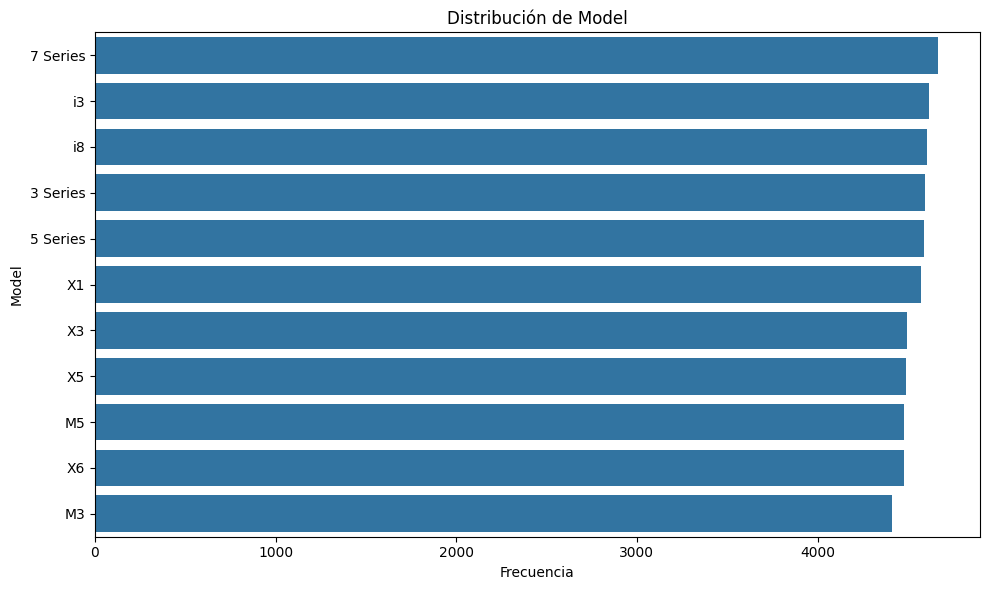


--- Distribución de Region ---
Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64


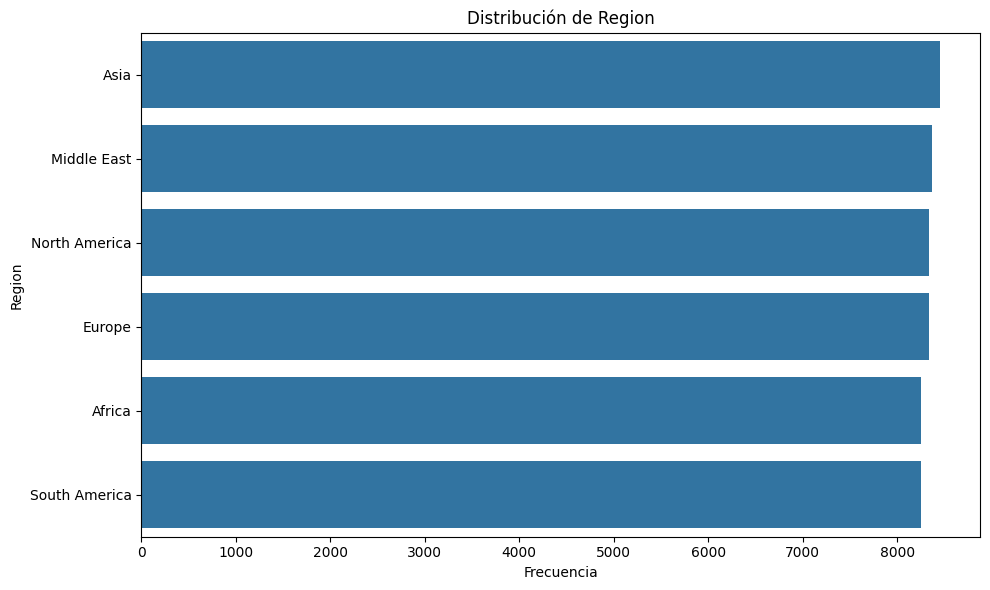


--- Distribución de Color ---
Color
Red       8463
Silver    8350
Grey      8348
White     8304
Black     8273
Blue      8262
Name: count, dtype: int64


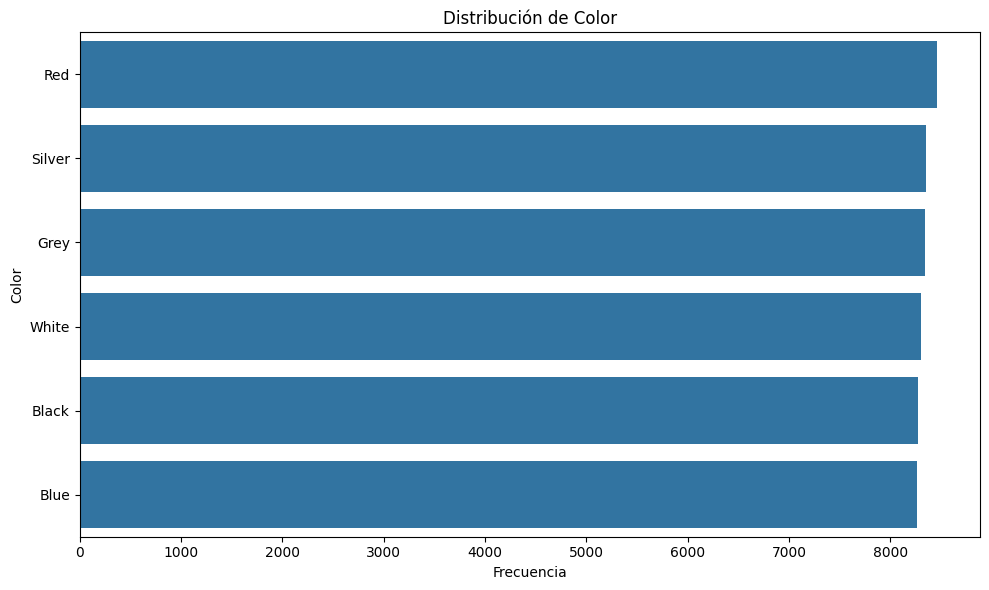


--- Distribución de Fuel_Type ---
Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64


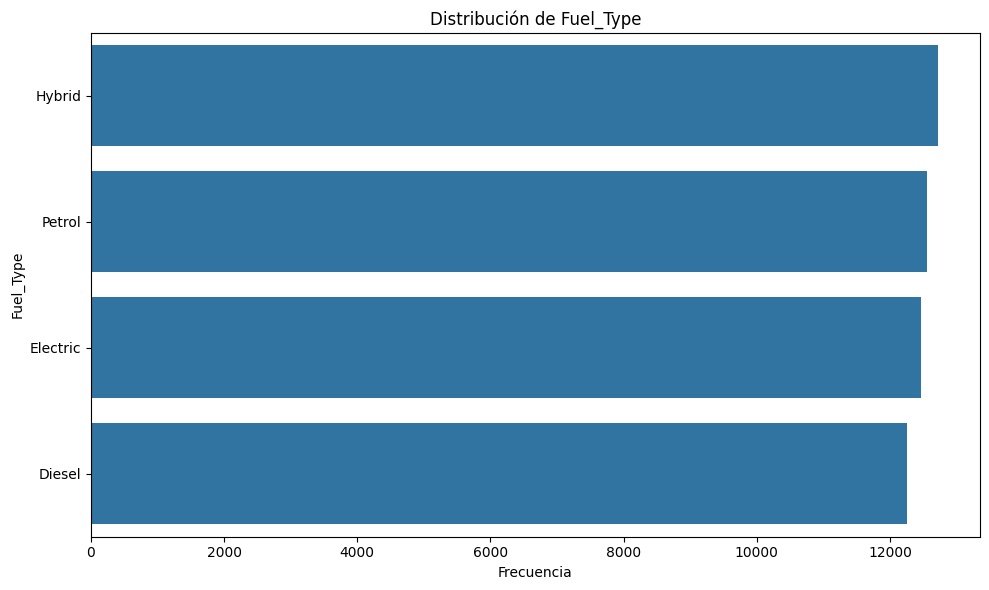


--- Distribución de Transmission ---
Transmission
Manual       25154
Automatic    24846
Name: count, dtype: int64


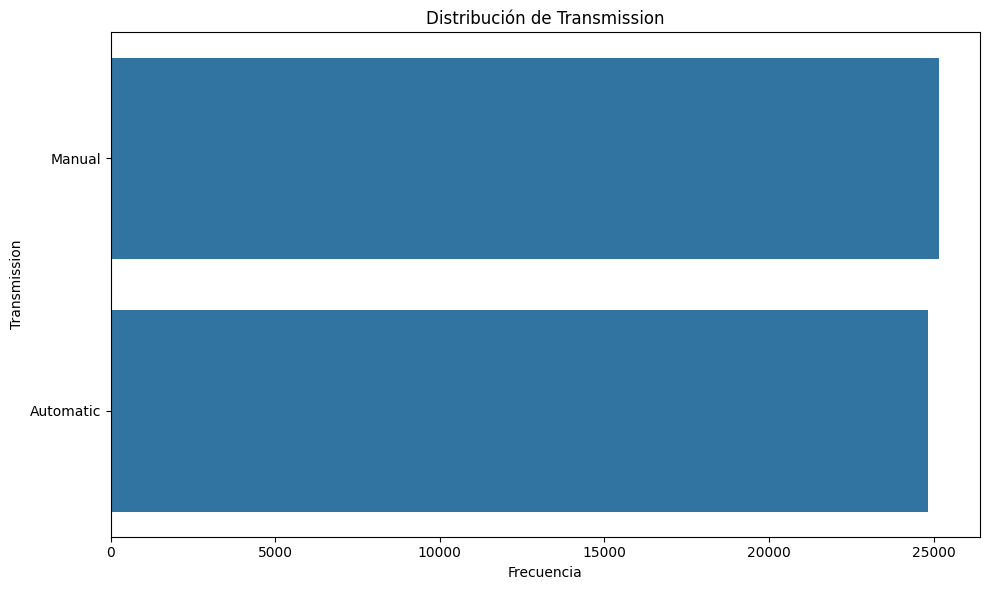

In [3]:
print("Análisis de Variables Categóricas:")
categorical_features = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']
for feature in categorical_features:
    print(f"\n--- Distribución de {feature} ---")
    print(data[feature].value_counts())
    
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[feature], order = data[feature].value_counts().index)
    plt.title(f'Distribución de {feature}')
    plt.xlabel('Frecuencia')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


Análisis de Variables Numéricas:


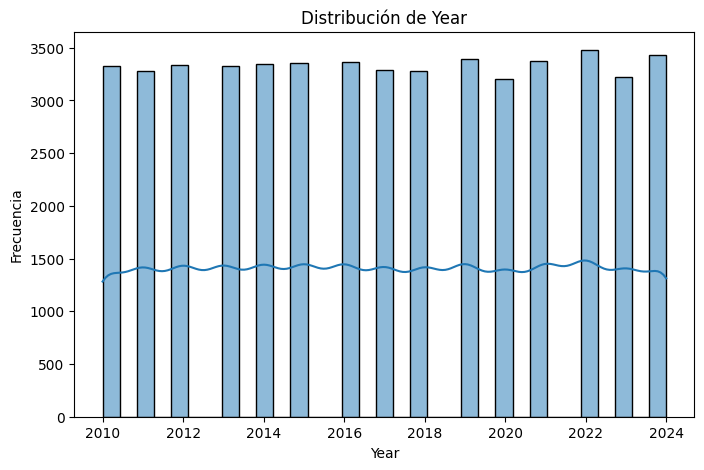

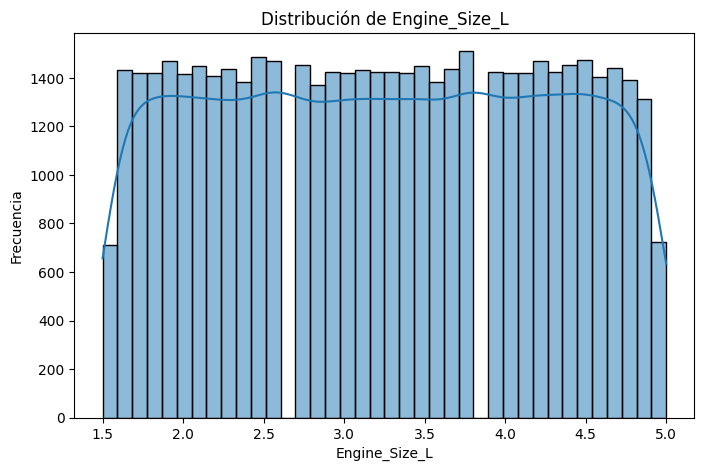

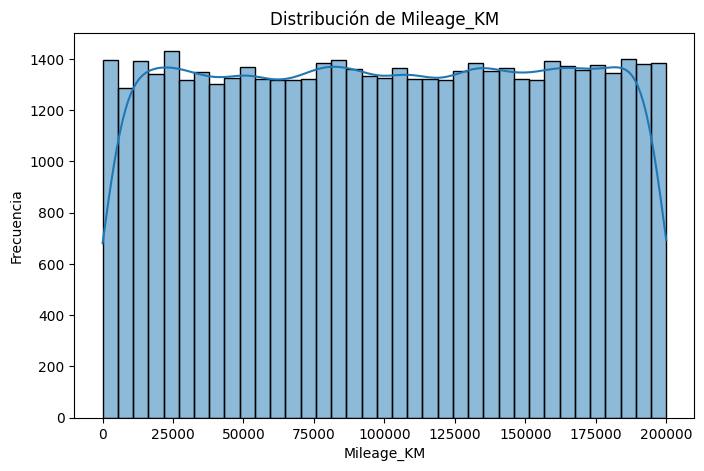

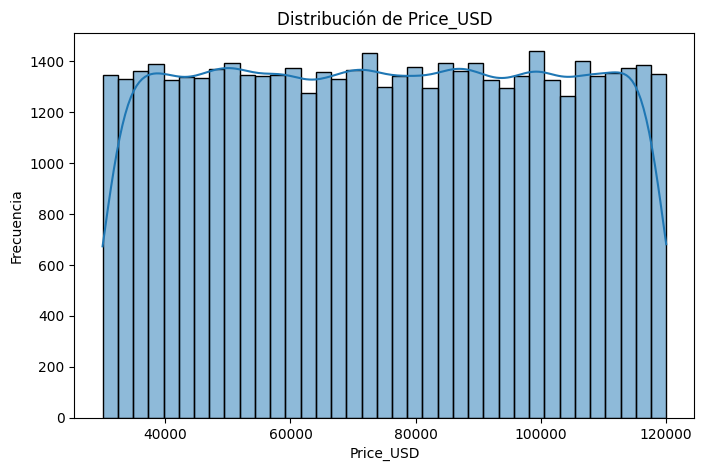

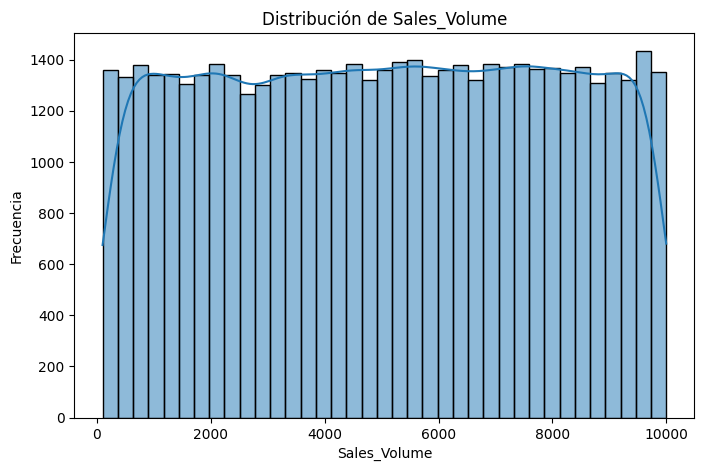

In [4]:
print("\nAnálisis de Variables Numéricas:")
numerical_features = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()


Generando Pairplot de variables numéricas...


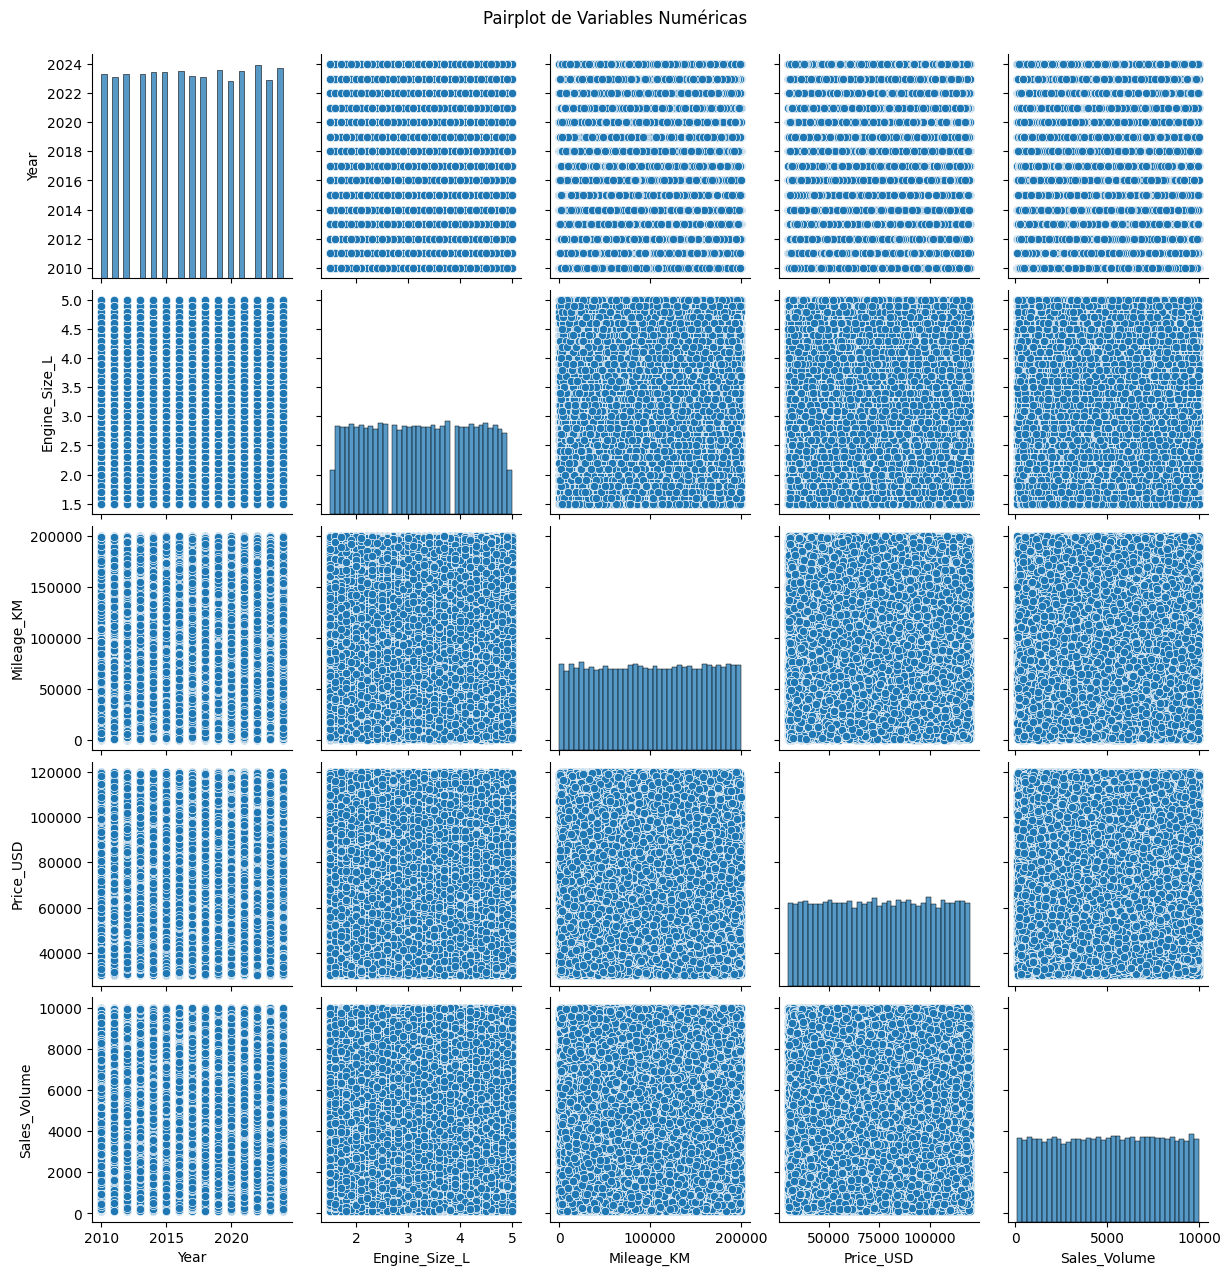

In [5]:
print("\nGenerando Pairplot de variables numéricas...")
sns.pairplot(data[numerical_features])
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.show()

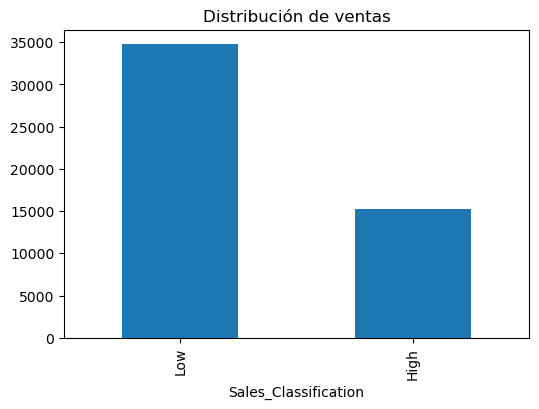

In [61]:
plt.figure(figsize=(6, 4))
data['Sales_Classification'].value_counts().plot(kind='bar')
plt.title('Distribución de ventas')
plt.show()

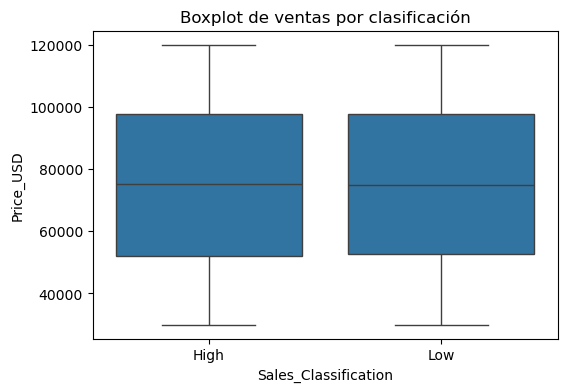

In [62]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Sales_Classification', y='Price_USD', data=data)
plt.title('Boxplot de ventas por clasificación')
plt.show()

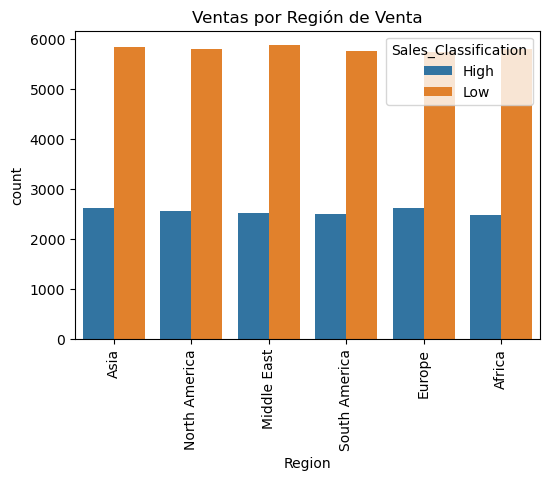

In [63]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Region', hue='Sales_Classification', data=data)
plt.xticks(rotation=90)
plt.title('Ventas por Región de Venta')
plt.show()

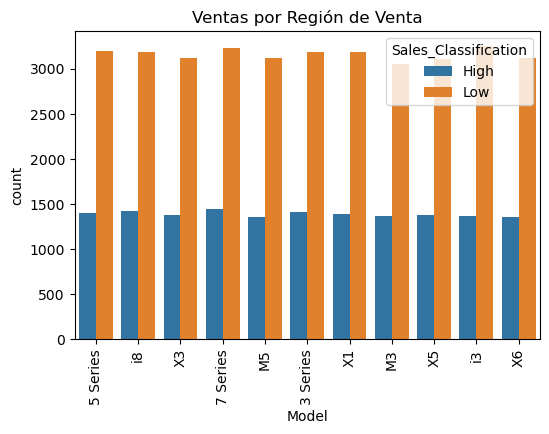

In [64]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Model', hue='Sales_Classification', data=data)
plt.xticks(rotation=90)
plt.title('Ventas por Región de Venta')
plt.show()

In [65]:
data['age_model'] = 2024 - data['Year']
data['is_luxury'] = (data['Price_USD'] > data['Price_USD'].quantile(0.75)).astype(int)

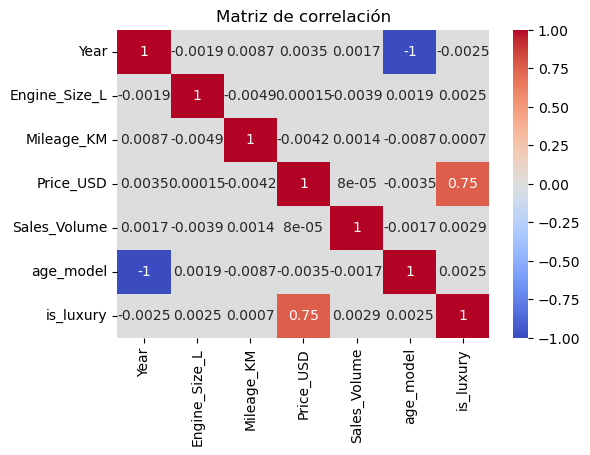

In [66]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# elegir features
features_num = ['Price_USD','Engine_Size_L','Mileage_KM','age_model']  # ajustar según dataset
features_cat = ['Model','Region','Fuel_Type','Transmission']     # ajustar

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, features_num),
    ('cat', cat_pipe, features_cat)
])


In [68]:
y = data['Sales_Classification'].map({'Low': 0, 'High': 1})

In [69]:
from sklearn.model_selection import train_test_split
X = data[features_num + features_cat]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [70]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, solver='liblinear'))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Price_USD', 'Engine_Size_L',
                                                   'Mileage_KM', 'age_model']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Model', 'Region',
                                                   'Fuel_Type',
                                                   'Transmission'])])),
                ('clf', LogisticRegression(max_iter=1000, solver='liblinear'))])

              precision    recall  f1-score   support

           0       0.70      1.00      0.82     10426
           1       0.00      0.00      0.00      4574

    accuracy                           0.70     15000
   macro avg       0.35      0.50      0.41     15000
weighted avg       0.48      0.70      0.57     15000

AUC: 0.49685349875789825


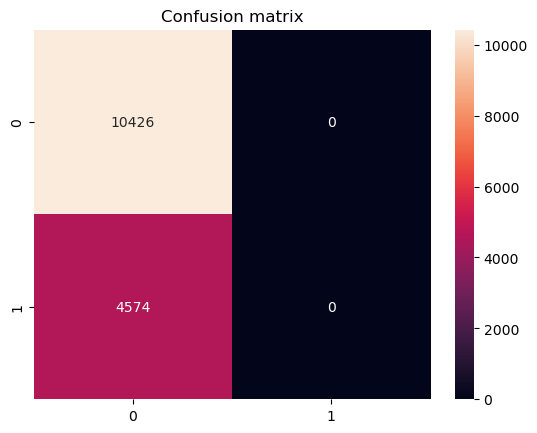

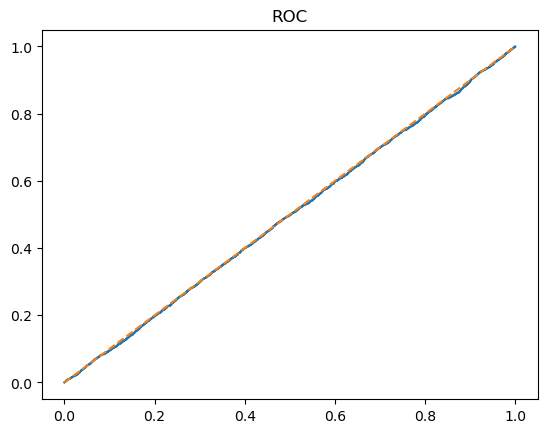

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

# matriz de confusión
import seaborn as sns; import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion matrix"); plt.show()

# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr,tpr); plt.plot([0,1],[0,1],'--'); plt.title("ROC"); plt.show()
